# Import necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
# load the dataset
df = pd.read_csv('Big-Mart-Sales.csv')

# Data Overview

In [3]:
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [6]:
# target column
df['OutletSales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64

In [7]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Visualizatoin of features using pairplot 

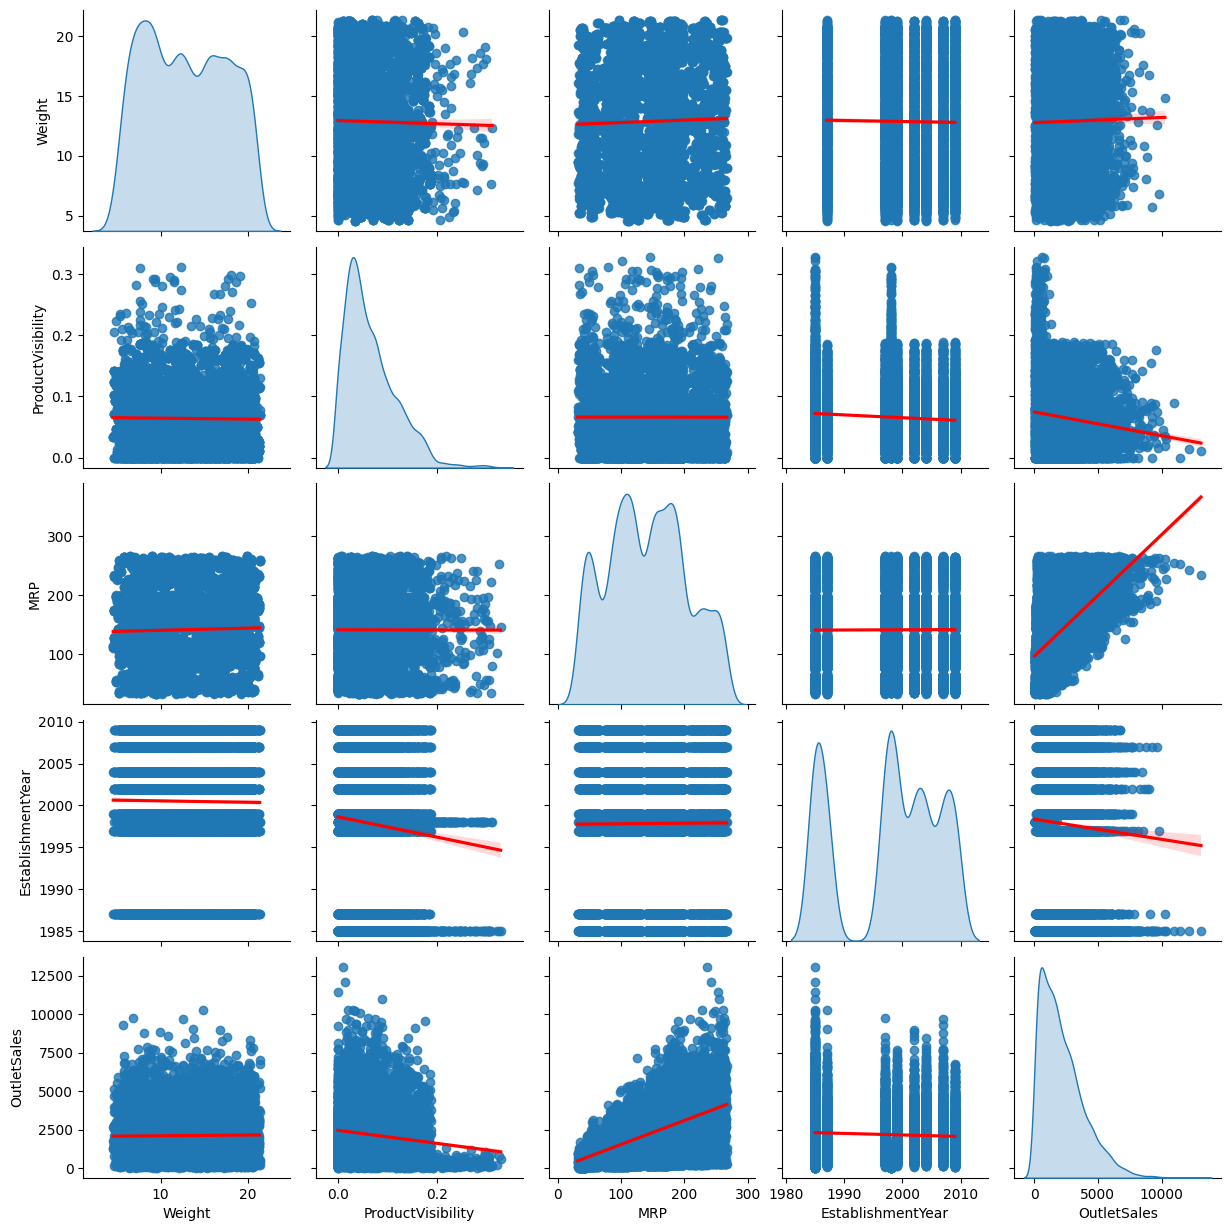

In [8]:

sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})

In [9]:
# correlation of numerical features
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                     Weight  ProductVisibility       MRP  EstablishmentYear  \
Weight             1.000000          -0.014048  0.027141          -0.011588   
ProductVisibility -0.014048           1.000000 -0.001315          -0.074834   
MRP                0.027141          -0.001315  1.000000           0.005020   
EstablishmentYear -0.011588          -0.074834  0.005020           1.000000   
OutletSales        0.014123          -0.128625  0.567574          -0.049135   

                   OutletSales  
Weight                0.014123  
ProductVisibility    -0.128625  
MRP                   0.567574  
EstablishmentYear    -0.049135  
OutletSales           1.000000  


In [10]:
# correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
ProductVisibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
EstablishmentYear,-0.011588,-0.074834,0.005020,1.000000,-0.049135
OutletSales,0.014123,-0.128625,0.567574,-0.049135,1.000000


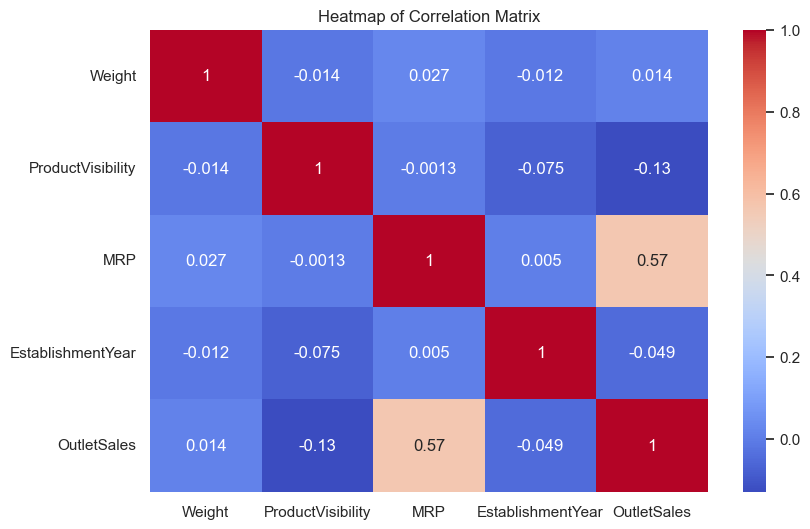

In [11]:
plt.figure(figsize=(9, 6))
sns.set()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Data Cleaning

In [12]:
df.isnull()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

 **We found 'Weight' has 1463 & 'OutletSize' has 2410 null values let's fill it**

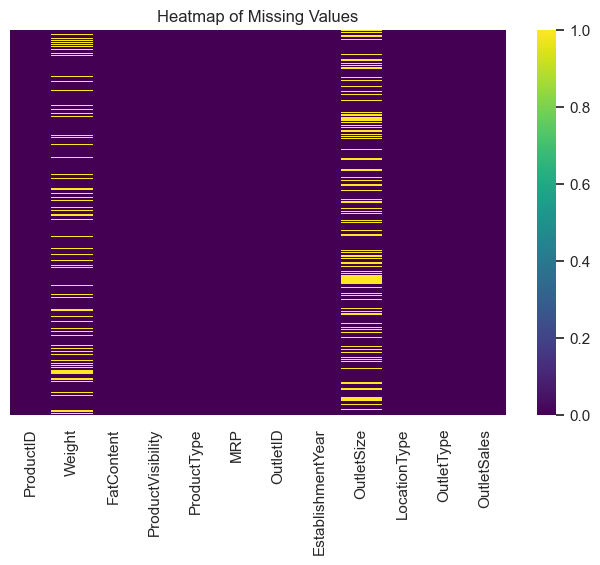

In [14]:

# Plot heatmap of missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(),cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

### The fill weight column null values using mean

In [15]:
df['Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Weight, Length: 8523, dtype: float64

In [16]:
df['Weight'].mean()

12.857645184135976

In [17]:
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

In [18]:
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


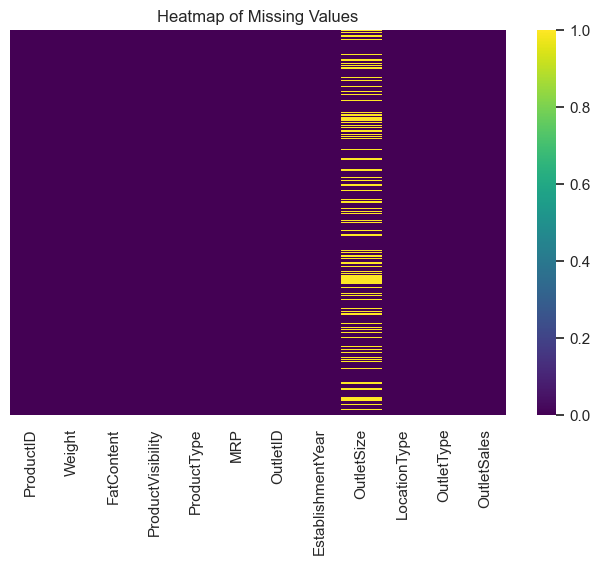

In [19]:
# Plot heatmap of missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(),cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

### The missing values in 'OutletSize' are filled based on the 'OutletType'

In [20]:
df['OutletSize']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: OutletSize, Length: 8523, dtype: object

In [21]:
df['OutletSize'].value_counts()

OutletSize
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [22]:
mode_outlet_size = df.pivot_table(values='OutletSize', 
                                  columns='OutletType', 
                                  aggfunc=(lambda x: x.mode()[0]))

In [23]:
mode_outlet_size

OutletType,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
OutletSize,Small,Small,Medium,Medium


In [24]:
def impute_outlet_size(cols):
    outlet_size = cols[0]  
    outlet_type = cols[1] 

    if pd.isnull(outlet_size): 
        if outlet_type in ['Grocery Store', 'Supermarket Type1']:
            return 'Small'
        elif outlet_type in ['Supermarket Type2', 'Supermarket Type3']:
            return 'Medium'
    return outlet_size  # Return the original OutletSize if not missing


In [25]:
df['OutletSize'] = df[['OutletSize', 'OutletType']].apply(impute_outlet_size, axis=1)


C:\Users\susha\AppData\Local\Temp\ipykernel_20528\3687536391.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outlet_size = cols[0]
C:\Users\susha\AppData\Local\Temp\ipykernel_20528\3687536391.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outlet_type = cols[1]


In [26]:
### HEATMAP after filling missing values 

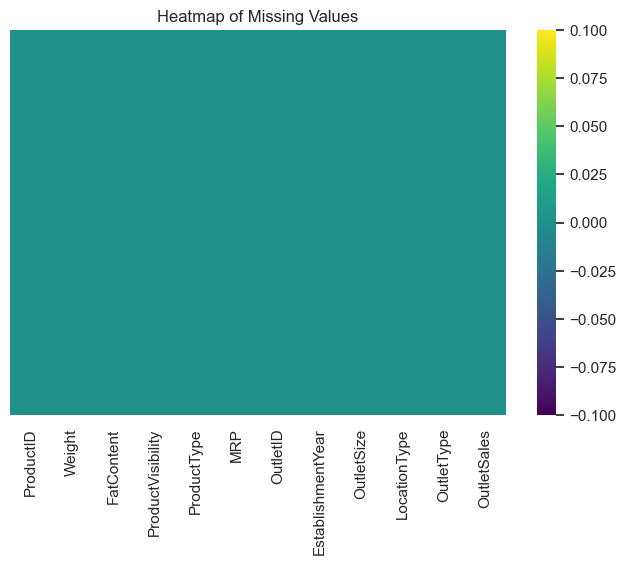

In [27]:
# Plot heatmap of missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(),cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [28]:
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [29]:
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [30]:
# Visualization of Features

Text(0.5, 1.0, 'Weight Distribution')

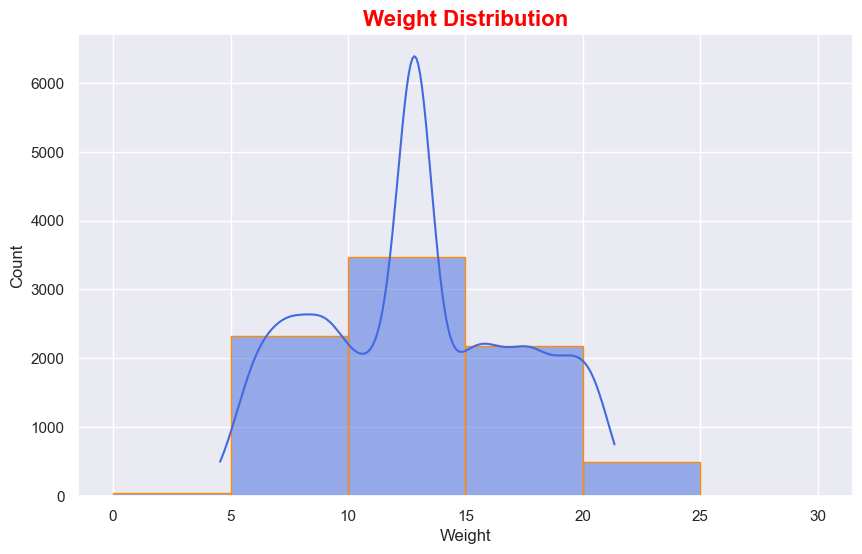

In [31]:

plt.figure(figsize=(10, 6))

sns.histplot(
    df['Weight'], 
    bins=[0, 5, 10, 15, 20, 25, 30], 
    color='royalblue',  
    edgecolor='darkorange',
    kde=True, 
    label='Weight'
)
plt.title("Weight Distribution", fontsize=16, fontweight='bold', color='red')


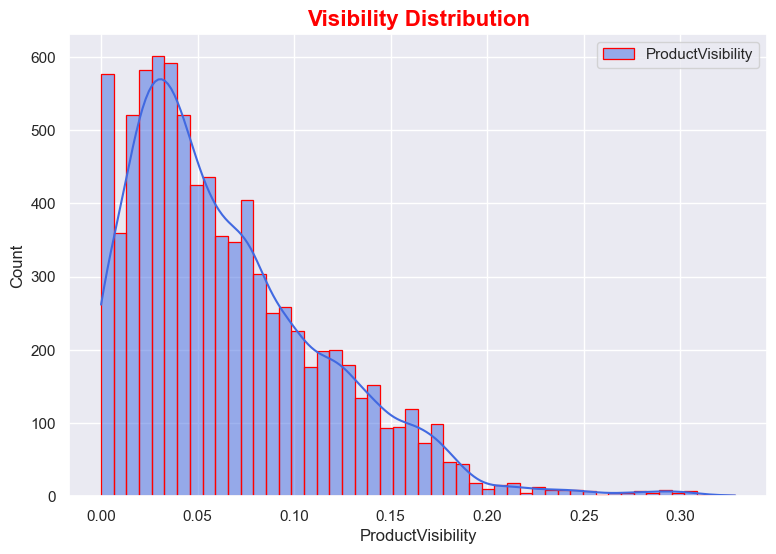

In [32]:
plt.figure(figsize=(9, 6))
sns.set()
sns.histplot(
    df['ProductVisibility'],
    color='royalblue',  
    edgecolor='red', 
    label='ProductVisibility',  
    kde=True
)

plt.title("Visibility Distribution", fontsize=16, fontweight='bold', color='red')
plt.legend()
plt.show()

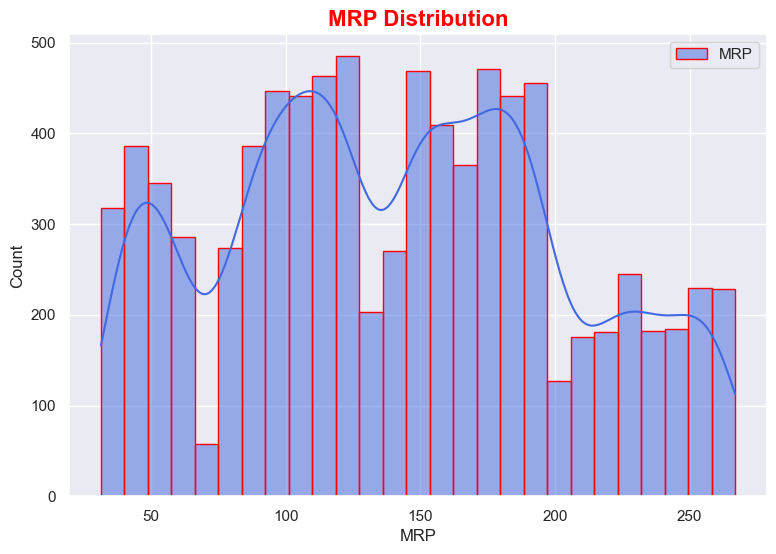

In [33]:
plt.figure(figsize=(9, 6))
sns.set()

sns.histplot(
    df['MRP'],
    color='royalblue',
    edgecolor='red',
    label='MRP',
    kde=True
)

plt.title("MRP Distribution", fontsize=16, fontweight='bold', color='red')
plt.legend()
plt.show()

C:\Users\susha\AppData\Local\Temp\ipykernel_20528\1676779297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EstablishmentYear', data=df, palette='deep')


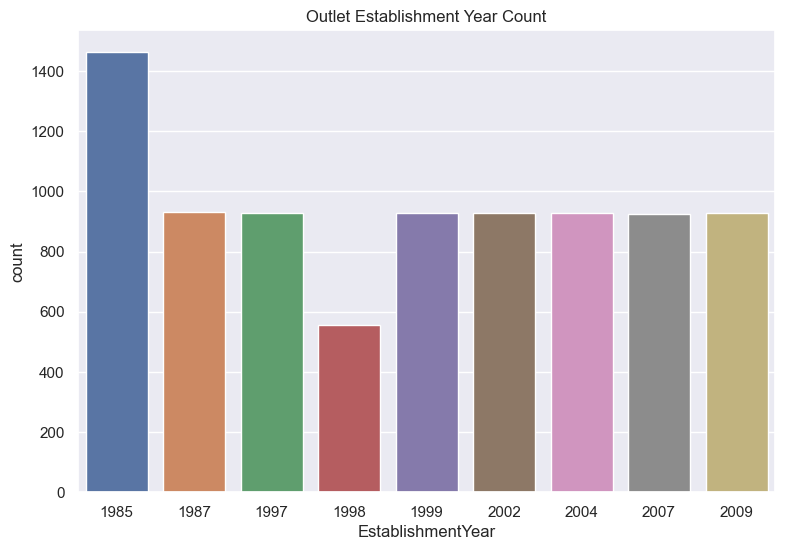

In [34]:
plt.figure(figsize=(9, 6))
sns.countplot(x='EstablishmentYear', data=df, palette='deep')
plt.title("Outlet Establishment Year Count")
plt.show()

C:\Users\susha\AppData\Local\Temp\ipykernel_20528\1587439679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FatContent', data=df, palette='deep')


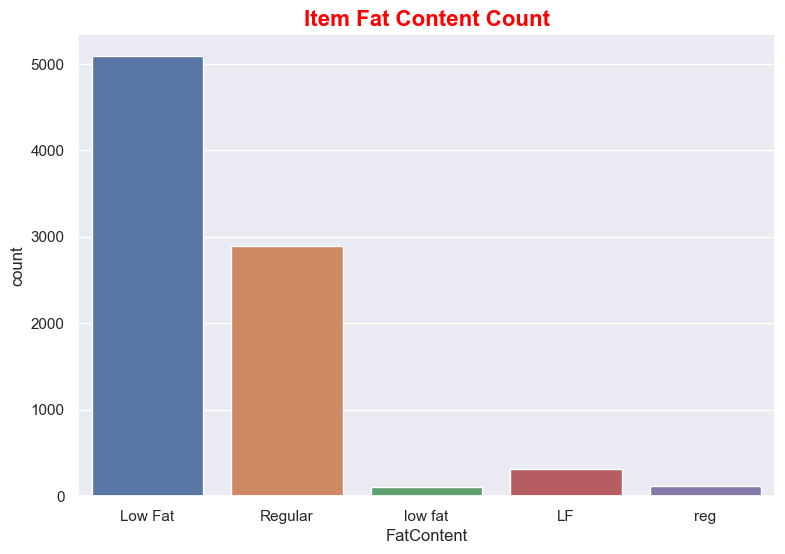

In [35]:

plt.figure(figsize=(9, 6))
sns.countplot(x='FatContent', data=df, palette='deep')
plt.title("Item Fat Content Count", fontsize=16, fontweight='bold', color='red')
plt.show()

C:\Users\susha\AppData\Local\Temp\ipykernel_20528\2606920268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ProductType', data=df, palette='deep')


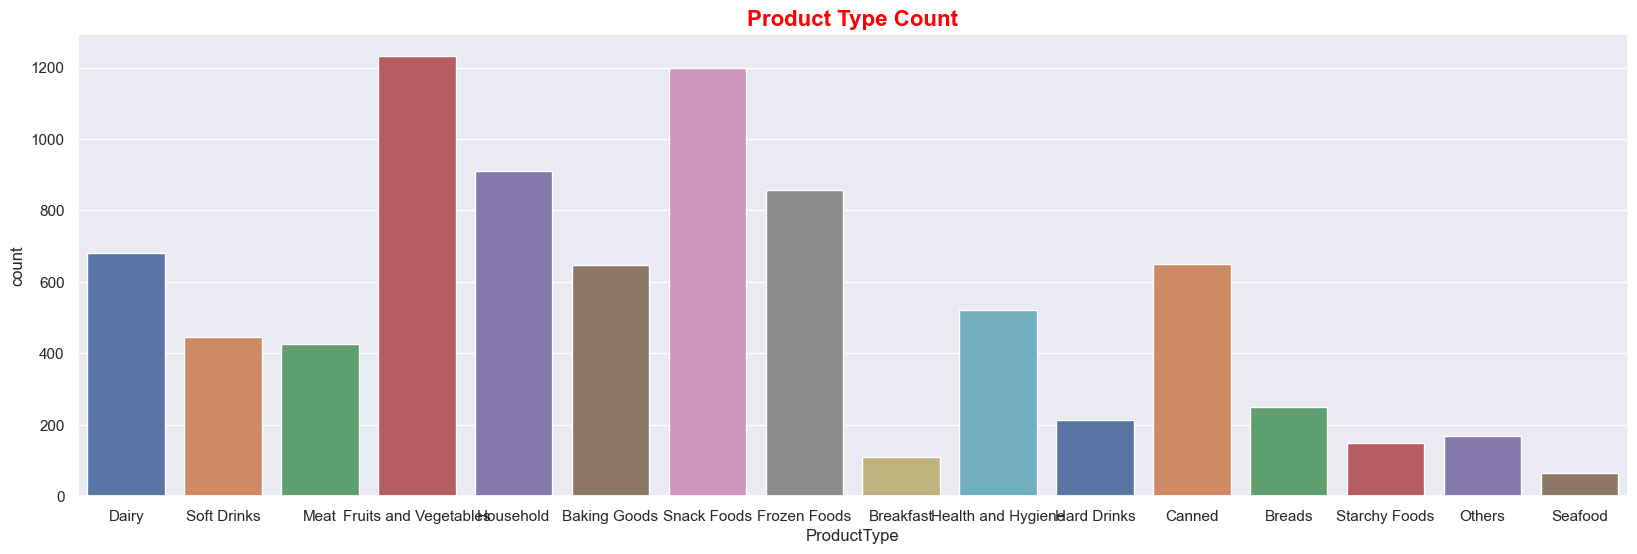

In [36]:
plt.figure(figsize=(20, 6))
sns.countplot(x='ProductType', data=df, palette='deep')
plt.title("Product Type Count", fontsize=16, fontweight='bold', color='red')
plt.show()


C:\Users\susha\AppData\Local\Temp\ipykernel_20528\3322275213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OutletID', data=df, palette='deep')


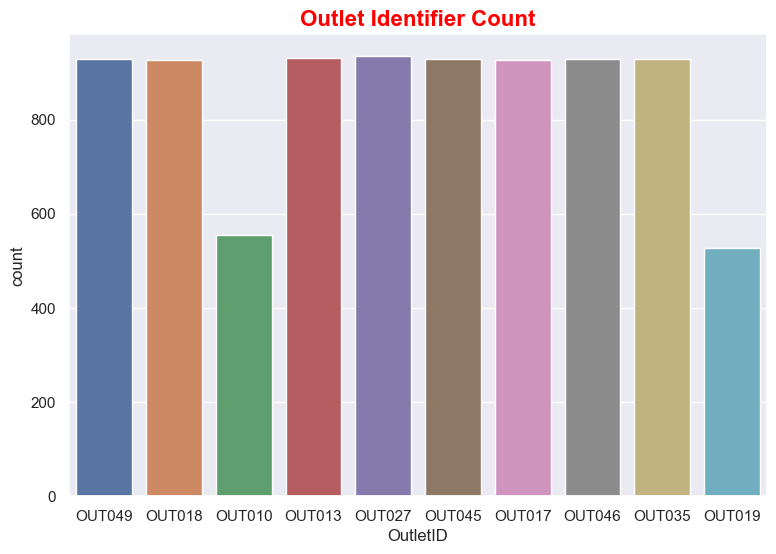

In [37]:
plt.figure(figsize=(9, 6))
sns.countplot(x='OutletID', data=df, palette='deep')
plt.title("Outlet Identifier Count", fontsize=16, fontweight='bold', color='red')
plt.show()

## From visualizations

In [38]:
# Replcing 'low fat', 'LF', 'reg' by a root words
df.replace({'FatContent': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}},
           inplace=True)


In [39]:
df['FatContent'].value_counts()

FatContent
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Features encoding using LabelEncoder

In [40]:
df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df['ProductID']=le.fit_transform(df['ProductID'])
df['FatContent']=le.fit_transform(df['FatContent'])
df['ProductType']=le.fit_transform(df['ProductType'])
df['OutletID']=le.fit_transform(df['OutletID'])
df['OutletType']=le.fit_transform(df['OutletType'])
df['OutletSize']=le.fit_transform(df['OutletSize'])
df['LocationType']=le.fit_transform(df['LocationType'])

In [43]:
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [44]:
df.corr()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
ProductID,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566,0.011550
FatContent,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001262,-0.001598,0.002199,0.018719
ProductVisibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468,-0.128625
ProductType,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
OutletID,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
EstablishmentYear,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
OutletSize,0.001229,-0.014105,-0.001262,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
LocationType,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367


<Axes: >

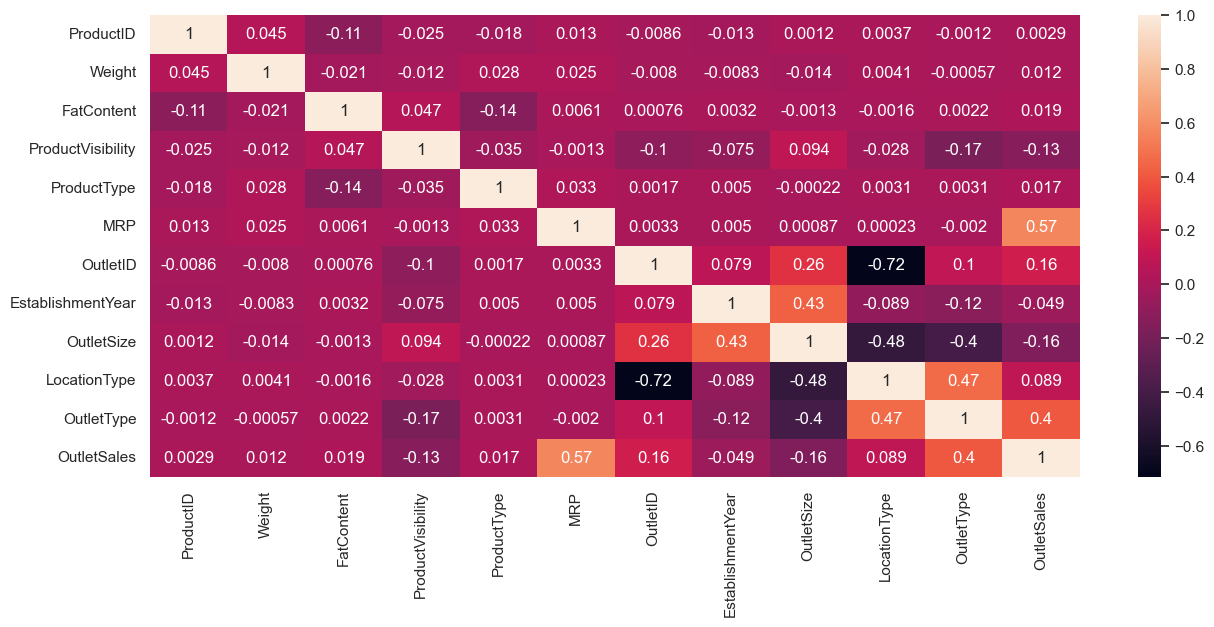

In [45]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True)

# Data splitting & Model training

In [46]:
X = df.drop('OutletSales', axis=1)
y = df['OutletSales']

In [47]:
X

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [48]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

In [51]:
enc = LabelEncoder()
encoded = enc.fit_transform(y_train)

In [52]:
print(utils.multiclass.type_of_target(y_train))

continuous


In [53]:
print(utils.multiclass.type_of_target(y_train.astype('int')))

multiclass


In [54]:
print(utils.multiclass.type_of_target(encoded))

multiclass


# Model Training, Evalution & Prediction

In [55]:
## Linear Regressioin

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse = mean_squared_error(y_test, y_pred)

In [62]:
mse

1379358.4041795747

In [63]:
## Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
y_pred3 = rf.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred3)

In [68]:
mse

1260772.4060834884

In [69]:
np.sqrt(mse)

1122.8412203350429

In [70]:
df['OutletSales'].mean()

2181.288913575032